## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "./data/"
ad = pd.read_csv(data_path + "Advertising.csv")

In [2]:
# 모델 유의성 평가 : F 검정
# 회귀계수 검정 : T 검정
model = smf.ols('Sales ~ Radio + Newspaper + TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        23:06:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# 신문광고에 의한 판매량은 실제 라디오 광고에 의한 것
model3 = smf.ols('Sales ~ Newspaper', data = ad).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [4]:
# 유의하지 않은 변수 제거
model4 = smf.ols('Sales ~ Radio + TV', data = ad).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
Radio,0.1880,0.008,23.382,0.000,0.172,0.204
TV,0.0458,0.001,32.909,0.000,0.043,0.048


In [5]:
# 추정된 회귀식에 의한 예측
pred = model4.get_prediction(exog = dict(TV=100, Radio=20))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256466,0.137526,10.985254,11.527677,7.929616,14.583316


#### 회귀 진단

In [6]:
auto = pd.read_csv(data_path +"Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
# 데이터 비선형성 확인
model_auto = smf.ols('mpg~horsepower', data = auto).fit()
model_auto.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


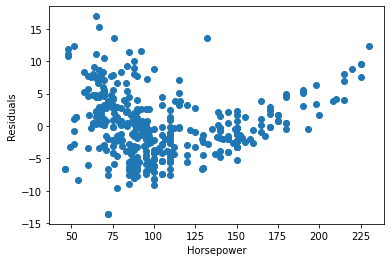

In [8]:
# 인지할만한 패턴이 존재한 이상적이지 않은 모델
plt.scatter(auto.horsepower, model_auto.resid)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

In [9]:
# 변수 변환
model_auto2 = smf.ols('mpg~horsepower+np.square(horsepower)', data = auto).fit()
model_auto2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


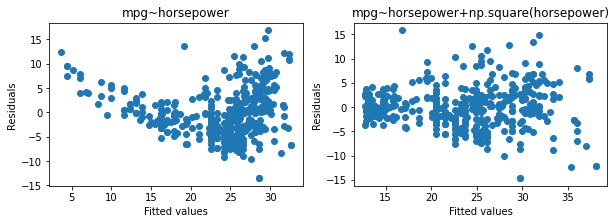

In [10]:
# Polynomial regression 을 사용할 때, x의 n승을 사용한다면, 그 아래 차수까지 들어가는 x의 n승도 모두 포함해야 한다.
# log 변환은 log x1 - log x0 = log x1/x0 가 되므로, 증가율에 대한 식으로 해석할 수 있기 때문에 log 변환은 해석의 무리가 없다
plt.figure(figsize=(10, 3))

plt.title('mpg~horsepower')
plt.subplot(1,2,1)
plt.scatter(model_auto.fittedvalues, model_auto.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower')

plt.subplot(1,2,2)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.show()

In [11]:
# 오차항의 상관성

x_t = np.random.normal(0, 1, 200) # 독립표본
x_t[0] = 0
y_t = np.zeros(200)
for i in range(1, 200):
    y_t[i] = np.random.normal(y_t[i - 1], 1) # 자기상관이 있는 표본

from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistics for x_t:', durbin_watson(x_t))
print('Durbin-Watson statistics for y_t:', durbin_watson(y_t))

# 자기 상관에 발생할 수 밖에 없는 요인을 설명변수에 넣어주게 되면
# 잔차는 설명이 되지 않은 부분이기 때문에 잔차의 자기 상관성이 남아 있지 않게 된다

Durbin-Watson statistics for x_t: 2.0366567553565287
Durbin-Watson statistics for y_t: 0.046350068165671776


In [12]:
durbin_watson(model_auto2.resid)

1.0782139387132905

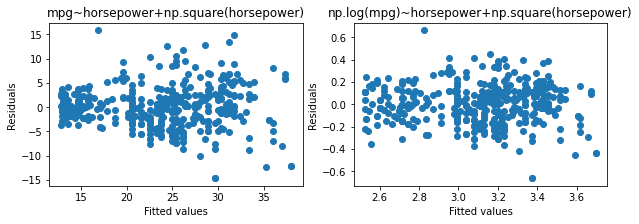

In [13]:
# 오차항의 이분산성
model_auto3 = smf.ols('np.log(mpg)~horsepower+np.square(horsepower)', data = auto).fit()
# print(model_auto3.summary())

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.subplot(1,2,2)
plt.scatter(model_auto3.fittedvalues, model_auto3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('np.log(mpg)~horsepower+np.square(horsepower)')
plt.show()

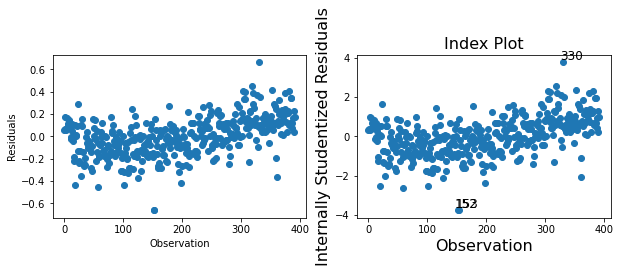

In [14]:
# 이상치 평가
inf3 = OLSInfluence(model_auto3)
# inf3.summary_frame()
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(auto.index,model_auto3.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
inf3.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

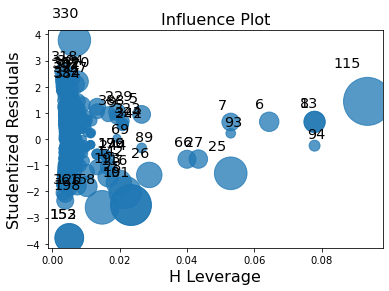

In [15]:
# 영향점 평가 (Leverage Statistics)
inf3.plot_influence()
plt.show()

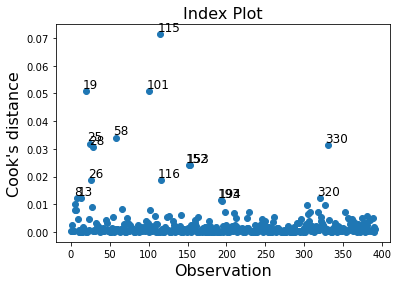

In [16]:
# 영향점 평가 (Cook's distance)
inf3.plot_index('cook',threshold=4/(model_auto3.nobs-2-1))
plt.show()

# 4/(n-p-1) 또는 4/n ;n은 관측치의 갯수, p는 변수의 갯수

In [17]:
model_auto3.nobs

392.0

In [18]:
# 다중공선성(Multicollinearity)

credit = pd.read_csv(data_path+"Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [19]:
model_credit = smf.ols('Balance~Age+Limit', data = credit).fit()
model_credit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


In [20]:
model_credit2 = smf.ols('Balance~Rating+Limit', data = credit).fit()
model_credit2.summary().tables[1]

# Age와 함께 적합시켰을 때와 달리, Limit가 유의하지 않다는 검정 결과가 나옴

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


In [21]:
model_credit3 = smf.ols('Balance~Age+Rating+Limit', data = credit).fit()

import patsy
y, X = patsy.dmatrices('Balance~Age+Rating+Limit', credit, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 23.80295451367821
VIF of Age : 1.0113846860681328
VIF of Rating : 160.66830095856935
VIF of Limit : 160.59287978597942


#### 다중회귀분석 실습 (Multiple Linear Regression Practice)

`houseprice.csv`는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 

1. 5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

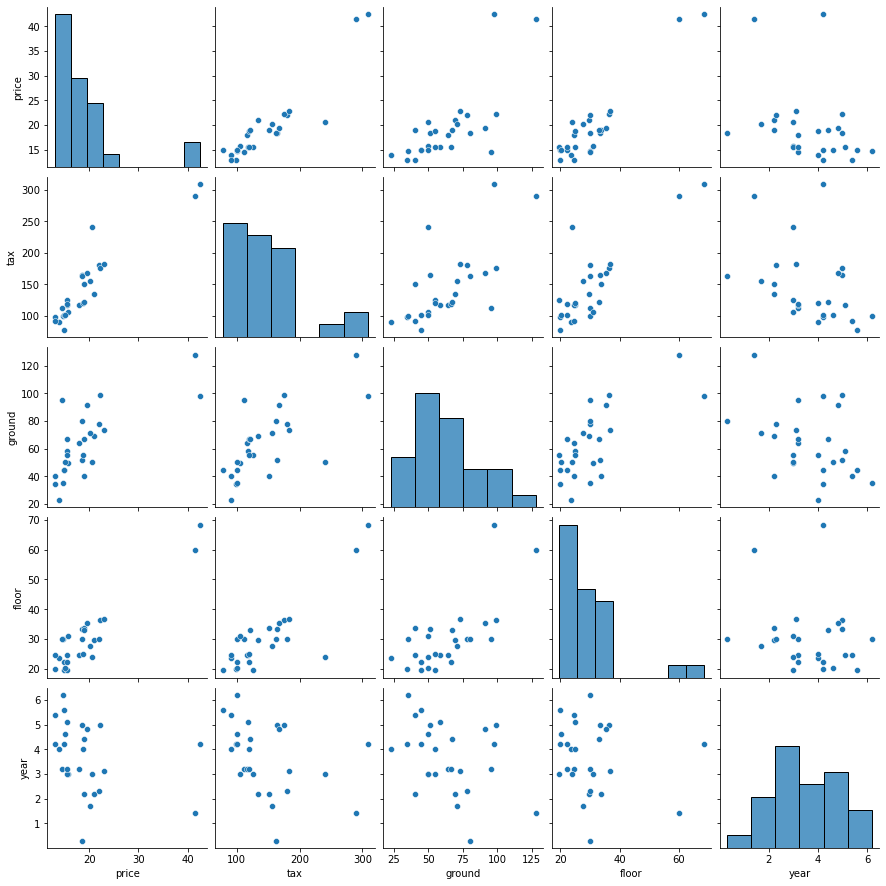

In [22]:
house = pd.read_csv("./data/houseprice.csv")

sns.pairplot(house)
plt.show()

2. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [24]:
model = smf.ols('price~tax+ground+floor+year',data=house).fit()
model.summary()

# 추정된 회귀식 y hat = 1.219 + 0.052 * tax + 0.011 * ground + 0.349 * floor - 0.219 * year
# F-statics: 74.53, P-value: 1.82e-12 = 모형이 굉장히 유의하다
# 계수의 P-value가 높다고 통계적으로 0 이 아니라고 할만큼 충분한 값을 가지지 못한다는 의미일뿐, 0이라는 것이 아님
# 귀무가설을 기각하지 못함 = 귀무가설이 참이다 → 해석은 그렇게 하지만 실상은 그렇지 않음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.82e-12
Time:                        23:07:02   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

0.931  
→ 93.1% 만큼 모형이 y를 설명한다  

주택 판매가격에 유의한 영향을 주는 변수 : tax, floor

4.  회귀진단을 위한 그래프들을 그리고 모형이 적절한지 판단하여라. Influential point가 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가?

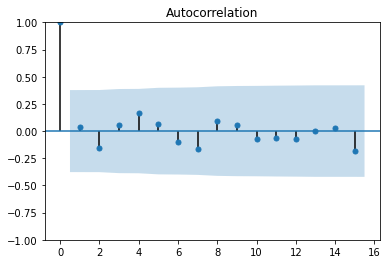

In [25]:
# 오차항의 독립성 확인

# group에 의해 발생하는 corrleation을 모형에 고려하려면: Multilevel model / hierarchical linear model 사용
model.resid # 모델의 잔차, 여러 집에서 측정한 집값이기 때문에 corrleation이 발생할 확률은 낮음
sm.graphics.tsa.plot_acf(model.resid) # sm API의 자기상관함수(auto corrleation function)을 그래프로 그림
plt.show()

# x축: lag(시점의 밀리는 갯수); 자료를 한 시점씩 미뤄서, 자신과 해당 과거의 자료의 자기상관성을 계산
# confidence band 안에 값이 들어간다는 의미는 자기상관성이 0과 크게 다르지 않음을 의미 

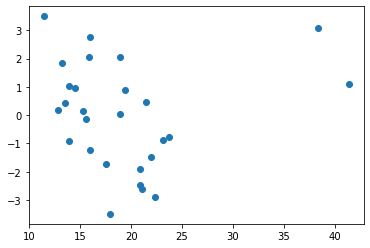

In [26]:
# 데이터의 비선형성 및 등분산성 확인

model.fittedvalues # y hat
plt.scatter(model.fittedvalues, model.resid) # residual plot

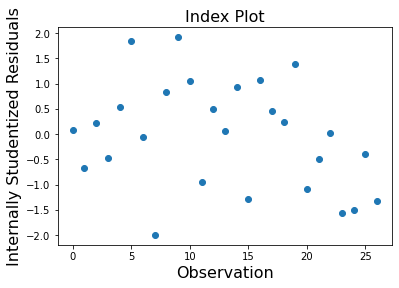

In [27]:
# 스튜던트화 잔차 = 이상치 확인

inf = OLSInfluence(model)
inf.plot_index('resid', threshold=3)
plt.show() # 3보다 큰게 없으므로 residual이 크지 않음을 판단 가능

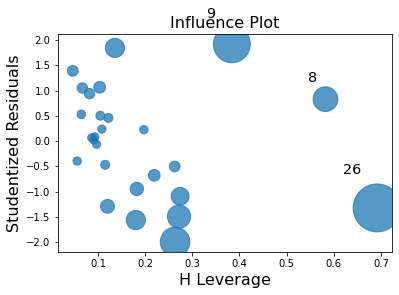

In [28]:
# 영향점 확인
inf.plot_influence()
plt.show()

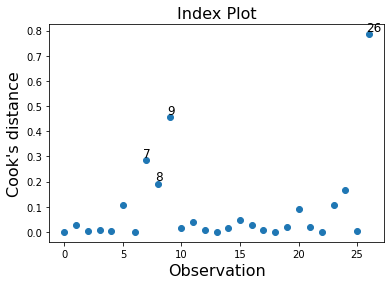

In [29]:
inf.plot_index('cook', threshold=4/(model.nobs-4-1))
plt.show()

In [30]:
#영향점은 함부로 빼는 것이 아니라, 특징을 확인해야 함
idx = [7,8,9,26]
house.iloc[idx, :]

,price,tax,ground,floor,year
7,14.45,112.186,95.2,30.02,3.2
8,42.45,308.404,98.0,68.40,4.2
9,41.45,289.196,128.0,60.00,1.4
26,20.50,240.000,50.0,24.00,3.0


In [31]:
house.describe() # 보통의 데이터가 어떤 형태인지 확인
# 8,9번 관측치는 집값과 평수, 세금이 높은 것을 확인
# 7번 관측치는 싼 집값에 비해 평수가 높음
# 26번은 평균인 집값에 비해 세금이 높음

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


In [32]:
# 관측치 수가 아주 많지 않다면, 그림을 그려보는 것이 확실
house['mark'] = 0
house.loc[house.index.isin(idx), 'mark'] = 1

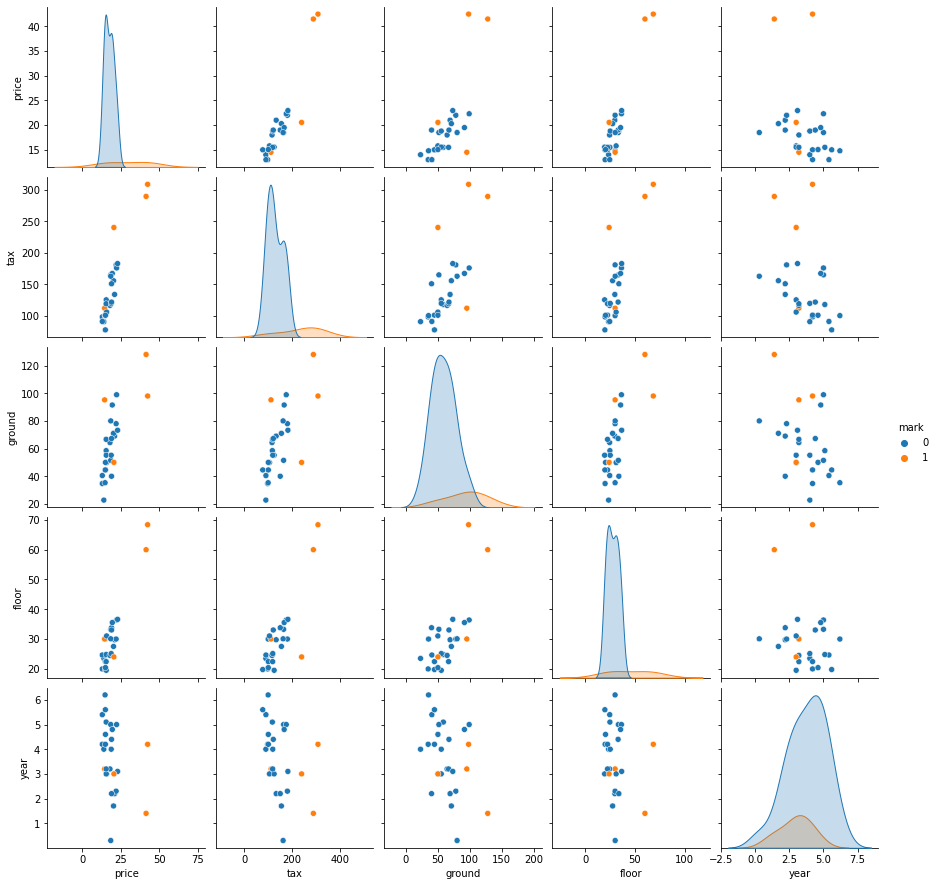

In [33]:
# 영향점을 별도로 구분하여 시각화
sns.pairplot(house, hue = 'mark')
plt.show()

In [34]:
house2 = house.drop(idx)
model2 = smf.ols('price~tax+ground+floor+year',data=house2).fit()

In [35]:
# 영향점을 제거한 회귀식 적합 결과
model2.summary().tables[1] # 계수 테이블만 확인

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.8682,1.936,3.547,0.002,2.800,10.937
tax,0.0379,0.021,1.850,0.081,-0.005,0.081
ground,0.0441,0.024,1.820,0.085,-0.007,0.095
floor,0.1467,0.085,1.723,0.102,-0.032,0.326
year,-0.2495,0.247,-1.010,0.326,-0.768,0.269


In [36]:
# 영향점 제거 전 기존 회귀식
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.2187,2.047,0.595,0.558,-3.026,5.463
tax,0.0519,0.014,3.756,0.001,0.023,0.081
ground,0.0116,0.025,0.458,0.652,-0.041,0.064
floor,0.3494,0.073,4.807,0.000,0.199,0.500
year,-0.2189,0.331,-0.660,0.516,-0.906,0.469


5. 세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

In [38]:
pred = model.get_prediction(exog=dict(tax=150, ground=50, floor=30, year=3)) # exog = 외생변수
pred.summary_frame(alpha=0.1) #신뢰구간 Confidence interval, obs는 예측구간

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.392991,20.439589,15.768865,23.063714
